Clayton Fields

Math 572 

Homework 5

In [17]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Feb 15 13:06:44 2020

@author: claytonfields
"""

import numpy as np
import pandas as pd
from scipy.linalg import inv, norm
from numpy import *
import sympy as sp
from sympy import Matrix
import matplotlib.pyplot as plt

def N_t(N_0,K,r,t):
    return (K*N_0)/(N_0 + (K-N_0)*np.exp(-r*t))

def dNdt(N_0,K,r,t):
    return r*N - N.T@N*(r/K)

def dNdr(N_0,K,r,t):
    n = t.size
    return ((K*N_0*t*(K-N_0)*np.exp(r*t))/(N_0*np.exp(r*t)+K-N_0)**2).reshape(n,1)

def dNdK (N_0,K,r,t):
    n = t.size
    return ((N_0**2*np.exp(r*t)*(np.exp(r*t)-1))/(K+N_0*(np.exp(r*t)-1))**2).reshape(n,1)


def LSE(N,N_0,K,r,t):
    return ((N-N_t(N_0,K,r,t))**2).sum()

def dLdr(N,N_0,K,r,t):
    term1 = ((-2*K*N_0*t*N*(K-N_0)*exp(-r*t))/(N_0+(K-N_0)*exp(-r*t))**2)
    term2 = ((2*K**2*N_0**2*t*(K-N_0)*np.exp(-r*t))/((K-N_0)*np.exp(-r*t)+N_0)**3)
    return term1.sum() + term2.sum()

def dLdK(N,N_0,K,r,t):
    term1 = (-2*N_0**2*N*exp(r*t)*(exp(r*t)-1))/(K+N_0*(exp(r*t)-1))**2
    term2 = (2*K*N_0**3*exp(2*r*t)*(exp(r*t)-1))/(K+N_0*(exp(r*t)-1))**3
    return term1.sum() + term2.sum()

def L_rr(N,N_0,K,r,t):
    term1 = (2*K*N_0*t**2*N*(K-N_0)*exp(r*t)*(-K+N_0*exp(r*t)+N_0))/(K+N_0*(exp(r*t)-1))**3
    term2 = (2*K**2*N_0**2*t**2*(K-N_0)*exp(2*r*t)*(2*K-N_0*exp(r*t)-2*N_0))/(K+N_0*exp(r*t)-N_0)**4
    return term1.sum() + term2.sum()

def L_kk(N,N_0,K,r,t):
    term1 = (4*N_0**2*N*exp(r*t)*(exp(r*t)-1))/(K+N_0*(exp(r*t)-1))**3
    term2 = (2*N_0**3*exp(2*r*t)*(exp(r*t)-1)*(-2*K+N_0*exp(r*t)-N_0))/(K+N_0*exp(r*t)-N_0)**4
    return term1.sum() + term2.sum()
    

def L_rk(N,N_0,K,r,t):
    term1 = (-2*N_0**2*t*N*exp(r*t)*(2*K*exp(r*t)-K-N_0*exp(r*t)+N_0))/(K+N_0*(exp(r*t)-1))**3
    term2 = (2*K*N_0**3*t*exp(2*r*t)*(3*K*exp(r*t)-2*K-2*N_0*exp(r*t)+2*N_0))/(K+N_0*exp(r*t)-N_0)**4
    return term1.sum() + term2.sum()


data = pd.read_csv('flourbeetles.dat', sep=" ")
t = data['days'].to_numpy()
N = data['beetles'].to_numpy()

Gauss-Newton Method


Iteration,r,K
5,0.117918,1034
6,0.117948,1034
7,0.117956,1034
8,0.117958,1034
9,0.117958,1034


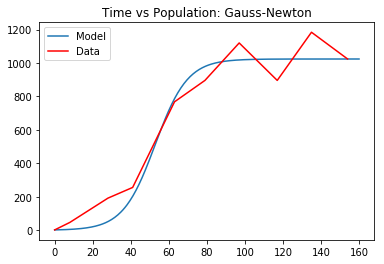

In [30]:
"""
Problem 1: From problem 2.6
Part A
"""
N_0=N[0]
K = 1200
r = .1
theta = [r,K]

A = np.hstack((dNdr(N_0,K,r,t),dNdK(N_0,K,r,t)))
x = N-N_t(N_0,K,r,t)
ls = [[0,r,K]]
maxiter = 10
H = []
#Implement Gauss Newton Method
print('Gauss-Newton Method')
for i in range(maxiter):
#     print("r: %.3f, K: %d" %(theta[0],np.round(theta[1])))
    theta = theta+inv(A.T@A)@(A.T@x)
    H.append(inv(A.T@A)@(A.T@x))
    A = np.hstack((dNdr(N_0,theta[1],theta[0],t),dNdK(N_0,theta[1],theta[0],t)))
    x = N-N_t(N_0,theta[1],theta[0],t)
    ls.append([i+1,theta[0],np.round(theta[1])])

# stderrA = np.sqrt(np.diag(H[-1]))
domain = np.linspace(0,160,300)
plt.plot(domain,N_t(N_0,1024,.118,domain))    
plt.plot(t,N,'r-')
plt.title('Time vs Population: Gauss-Newton')
plt.legend(('Model','Data'))

df = pd.DataFrame(ls[5:-1], columns = ['Iteration','r','K'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df


Newton-Raphson Method


Iteration,r,K,H
15,0.13945,794,[[1.65449848e+08 9.64218500e+03] [9.64218500e+03 1.15620000e+01]]
16,0.122476,1008,[[2.23641969e+08 2.07692340e+04] [2.07692340e+04 1.06010000e+01]]
17,0.117304,1034,[[3.22549211e+08 2.33786330e+04] [2.33786330e+04 1.02510000e+01]]
18,0.117939,1034,[[3.07010765e+08 2.32685220e+04] [2.32685220e+04 1.02920000e+01]]
19,0.117959,1034,[[3.06558498e+08 2.32631520e+04] [2.32631520e+04 1.02930000e+01]]


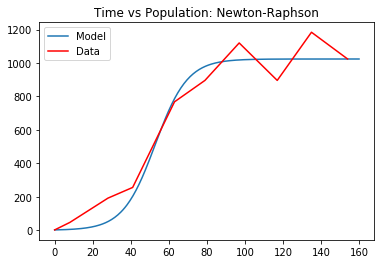

In [38]:
"""
Problem 1 Part B
"""
#Implement Newton Raphson
# t = data['days'].to_numpy()
# N = data['beetles'].to_numpy()

N_0=N[0]
K = 1200
r = .3
theta = [r,K]
maxiter = 20
grad = np.array([dLdr(N,N_0,K,r,t),dLdK(N,N_0,K,r,t)])
H = np.array([[L_rr(N,N_0,K,r,t),L_rk(N,N_0,K,r,t)],[L_rk(N,N_0,K,r,t),L_kk(N,N_0,K,r,t)]])
ls=[[0,r,K,H]]

print()
print('Newton-Raphson Method')
for i in range(maxiter):
   # print("r: %.3f, K: %d" %(theta[0],np.round(theta[1])))
#    print('grad: ', grad)
#    print('hessian: ', H)
    theta = theta-inv(H)@grad
    grad = np.array([dLdr(N,N_0,theta[1],theta[0],t),dLdK(N,N_0,theta[1],theta[0],t)])
    H = np.array([[L_rr(N,N_0,theta[1],theta[0],t),L_rk(N,N_0,theta[1],theta[0],t)],\
                   [L_rk(N,N_0,theta[1],theta[0],t),L_kk(N,N_0,theta[1],theta[0],t)]])
    ls.append([i+1,theta[0],np.round(theta[1]),np.around(H,3)])

stderrB = np.sqrt(np.diag(H[-1]))
plt.figure()
domain = np.linspace(0,160,300)
plt.plot(domain,N_t(N_0,1024,.118,domain))    
plt.plot(t,N,'r-')
plt.title('Time vs Population: Newton-Raphson')
plt.legend(('Model','Data'))
    
df = pd.DataFrame(ls[15:20], columns = ['Iteration','r','K','H'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

Gauss-Newton Method: Log Normal


Iteration,r,K
7,0.192388,821
8,0.192446,821
9,0.19249,821
10,0.192523,821
11,0.192547,821
12,0.192566,821


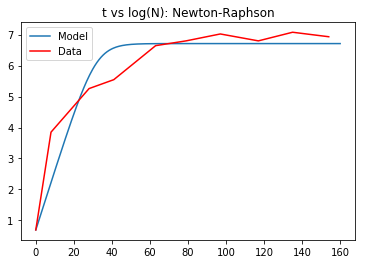

In [39]:
"""
Problem 1 Part C: Gauss-Newton Method
"""
def Logdldk(N,N0,K,r,t):
    return (N0*(exp(r*t)-1))/ (K*(K+N0*(exp(r*t)-1)))

def Logdldr(N,N0,K,r,t):
    return (t*(K-N0))/(K+N0*(exp(r*t)-1))

def Logd2dk2(N,N0,K,r,t):
    return 1/(K+N0*(exp(r*t)-1))**2 - 1/K**2

def Logd2r2(N,N0,K,r,t):
    return -(N0*t**2*(K-N0)*exp(r*t))/(K+N0*(exp(r*t)-1))**2
    
def Logd2drdk(N,N0,K,r,t):
    return (N0*t*exp(r*t))/(K+N0*exp(r*t)-N0)**2
    
def dQdk(N,N0,K,r,t):
    return 2*(((N0*(exp(r*t)-1)*(log(N)-log(N_t(N_0,K,r,t))))/(K*(K+N0*exp(r*t)-N0))).sum())

def dQdr(N,N0,K,r,t):
    return ((2*t*(K-N0)*(log(N)-log((K*N0*exp(r*t))/(K+N0*(exp(r*t)-1)))))/(K+N0*(exp(r*t)-1))).sum()

def d2Qdr2(N,N0,K,r,t):
    return 2*((log(N)-log(N_t(N0,K,r,t)))*Logd2r2(N,N0,K,r,t)-Logdldr(N,N0,K,r,t)**2).sum()

def d2Qdk2(N,N0,K,r,t):
    return 2*((log(N)-log(N_t(N0,K,r,t)))*Logd2dk2(N,N0,K,r,t)-Logdldk(N,N0,K,r,t)**2).sum()

def d2Qdrdk(N,N0,K,r,t):
    return 2*((log(N)-log(N_t(N0,K,r,t)))*Logd2drdk(N,N0,K,r,t)-Logdldr(N,N0,K,r,t)*Logdldk(N,N0,K,r,t)).sum()

#N_0=N[0]
K = 800
r = .19
theta = [r,K]
ls=[[0,r,K]]

A = np.hstack((Logdldr(N,N_0,K,r,t).reshape(10,1),Logdldk(N,N_0,K,r,t).reshape(10,1)))
x = log(N)-log(N_t(N_0,K,r,t))

maxiter = 12

#Implement Gauss Newton Method
print('Gauss-Newton Method: Log Normal')
for i in range(maxiter):
    #print("r: %.3f, K: %d" %(theta[0],np.round(theta[1])))
    theta = theta+inv(A.T@A)@(A.T@x)
    A = np.hstack((Logdldr(N,N_0,theta[1],theta[0],t).reshape(10,1), Logdldk(N,N_0,theta[1],theta[0],t).reshape(10,1)))
    x = log(N)-log(N_t(N_0,theta[1],theta[0],t))
    ls.append([i+1,theta[0],np.round(theta[1])])


plt.figure()
domain = np.linspace(0,160,300)
plt.plot(domain,log(N_t(2,np.round(theta[1]),theta[0],domain)))    
plt.plot(t,log(N),'r-')
plt.title('t vs log(N): Newton-Raphson')
plt.legend(('Model','Data'))
    
df = pd.DataFrame(ls[7:], columns = ['Iteration','r','K'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df


Newton-Raphson Method Log Normal
Standard error estimates: 
r:  0.21232467220921067
K:  0.004453888284649287


Iteration,r,K,Hessian
3,0.172286,869,[[-7.09485207e+02 -4.79772917e-02] [-4.79772917e-02 -1.70026085e-05]]
4,0.185361,835,[[-4.25827959e+02 -4.62348782e-02] [-4.62348782e-02 -1.89114977e-05]]
5,0.191369,823,[[-3.29741575e+02 -4.52708850e-02] [-4.52708850e-02 -1.96811420e-05]]
6,0.192573,820,[[-3.11916165e+02 -4.50888192e-02] [-4.50888192e-02 -1.98312172e-05]]
7,0.19262,820,[[-3.11224306e+02 -4.50817771e-02] [-4.50817771e-02 -1.98371119e-05]]
8,0.19262,820,[[-3.11223253e+02 -4.50817664e-02] [-4.50817664e-02 -1.98371209e-05]]


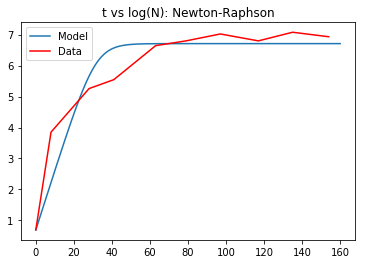

In [37]:
"""
Problem 1 Part C: Gauss-Newton Method
"""

#Implement Newton Raphson
N0=2
K = 800
r = .1
theta = [r,K]
maxiter = 8

grad = np.array([dQdr(N,N0,K,r,t),dQdk(N,N0,K,r,t)])
H = np.array([[d2Qdr2(N,N0,K,r,t),d2Qdrdk(N,N0,K,r,t)],
               [d2Qdrdk(N,N0,K,r,t),d2Qdk2(N,N0,K,r,t)]])
ls=[[0,theta[0],np.round(theta[1]),H]]
    
    
print()
print('Newton-Raphson Method Log Normal')
for i in range(maxiter):
    #print("r: %.3f, K: %d" %(theta[0],np.round(theta[1])))
#    print('grad: ', grad)
#    print('hessian: ', H)
    theta = theta-inv(H)@grad
    grad = np.array([dQdr(N,N0,theta[1],theta[0],t),dQdk(N,N0,theta[1],theta[0],t)])
    H = np.array([[d2Qdr2(N,N0,theta[1],theta[0],t),d2Qdrdk(N,N0,theta[1],theta[0],t)],
                   [d2Qdrdk(N,N0,theta[1],theta[0],t),d2Qdk2(N,N0,theta[1],theta[0],t)]])   
    ls.append([i+1,theta[0],np.round(theta[1]),H])

plt.figure()
domain = np.linspace(0,160,300)
plt.plot(domain,log(N_t(2,np.round(theta[1]),theta[0],domain)))    
plt.plot(t,log(N),'r-')
plt.title('t vs log(N): Newton-Raphson')
plt.legend(('Model','Data'))
    
stderr = np.sqrt(np.diag(-H[-1]))
print('Standard error estimates: ')
print('r: ',stderr[0,0])
print('K: ',stderr[1,1])
    
df = pd.DataFrame(ls[3:], columns = ['Iteration','r','K','Hessian'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

The standard error estimate for r is relatively high given that r is between 0 and 1, so the error is a sizable proportion of the estimated value. The standard error estimate for K is low given the high estimated value of K.

In [24]:
"""
Problem 02: From example 4.2
"""
def ENcc(nc,pc,pi,pt):
    return (nc*pc**2)/(pc**2+2*pc*pi+2*pc*pt)

def ENci(nc,pc,pi,pt):
    return (2*nc*pc*pi)/(pc**2+2*pc*pi+2*pc*pt)

def ENct(nc,pc,pi,pt):
    return (2*nc*pc*pt)/(pc**2+2*pc*pi+2*pc*pt)

def ENii(ni,pi,pt):
    return (ni*pi**2)/(pi**2+2*pi*pt)

def ENit(ni,pi,pt):
    return (2*ni*pi*pt)/(pi**2+2*pi*pt)

def p_c(ncc,nci,nct):
    return (2*ncc+nci+nct)/(2*622)

def p_i(nii,nit,nci):
    return (2*nii+nit+nci)/(2*622)

def p_t(nit,nct,ntt):
    return (2*ntt+nct+nit)/(2*622)

nc = 85; ni = 196; nt = ntt = 341
n = nc + ni +nt
pc = pi = pt = .333333

k=0
pcl = [pc]
pil = [pi]
ptl = [pt]
ls=[]

#Implement EM algorithm
print()
for i in range(10):
    #E step
    ncc = ENcc(nc,pc,pi,pt)
    nci = ENci(nc,pc,pi,pt)
    nct = ENct(nc,pc,pi,pt)
    nii = ENii(ni,pi,pt)
    nit = ENit(ni,pi,pt)
    #Mstep
    pc = p_c(ncc,nci,nct)
    pi = p_i(nii,nit,nci)
    pt = p_t(nit,nct,ntt)
    
    pcl.append(pc)
    pil.append(pi)
    ptl.append(pt)
    k+=1

Dcl = []
Dil = []
for i in range(9):
    Dcl.append((pcl[i+1]-pcl[-1])/(pcl[i]-pcl[-1]))
    Dil.append((pil[i+1]-pil[-1])/(pil[i]-pil[-1]))

p = np.hstack((np.array(pcl).reshape(11,1),np.array(pil).reshape(11,1))) 
R=[]
for i in range(9):
    R.append(norm(p[i+1].reshape(2,1)-p[i].reshape(2,1))/norm(p[i]))
for i in range(9):
    ls.append([i,pcl[i],pil[i],R[i],Dcl[i],Dil[i]])

df = pd.DataFrame(ls[:-1], columns = ['Iteration','p_C^(t)','p_I^(t)','R^(t)','D_C^(t)','D_I^(t)'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df    

Iteration,p_C^(t),p_I^(t),R^(t),D_C^(t),D_I^(t)
0,0.333333,0.333333,0.570685,0.0425022,0.33659
1,0.0819936,0.237406,0.163121,0.0369326,0.187655
2,0.071249,0.19787,0.035756,0.0367268,0.177799
3,0.070852,0.19036,0.00658604,0.0367193,0.176237
4,0.0708375,0.189023,0.00116832,0.036719,0.175921
5,0.0708369,0.188787,0.0002058,0.0367189,0.175749
6,0.0708369,0.188745,3.62052e-05,0.0367172,0.175087
7,0.0708369,0.188738,6.36786e-06,0.0366715,0.171366
